<div style="background-color:lightgreen; color:darkgreen; padding:10px; width:40%; font-size:25px; margin:0 left; text-align:left;">
   IMPORTING THE NECESSARY LIBRARIES
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import resample

<div style="background-color:lightgreen; color:darkgreen; padding:10px; width:40%; font-size:25px; margin:0 left; text-align:left;">
   READING THE DATASET
</div>

In [2]:
dataset=pd.read_csv("Diabetes Missing Data.csv")

In [3]:
dataset.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<div style="background-color:lightgreen; color:darkgreen; padding:10px; width:50%; font-size:25px; margin:0 left; text-align:left;">
   STATISTICS OF DATASET / 5 NUMBER SUMMARY
</div>

In [4]:
dataset.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<div style="background-color:lightgreen; color:darkgreen; padding:10px; width:90%; font-size:25px; margin:0 left; text-align:left;">
  IT IS ALWAYS A GOOD PRACTISE TO COPY THE DATASET AND PERFORM THE MANIPULATIONS
</div>

In [5]:
df=dataset.copy()

<div style="background-color:lightgreen; color:darkgreen; padding:10px; width:70%;font-size:25px; margin:0 left; text-align:left;">
INFORMATION ABOUT THE DATASET
</div>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    int64  
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


<div style="background-color:lightgreen; color:darkgreen; padding:10px; width:70%; margin:0 left; text-align:left;">
<ul>
   <li>WE CAN SEE THAT THE OUTPUT VARIABLE HAS THE THE DATATYPE IS "int 64".
   <li>ALSO GLUCOSE HAS THE DATATYPE "obj" IT SHOULD BE FLOAT.
</div>

<div style="background-color:lightblue; color:blue; padding:10px; width:70%; margin:0 left; font-size:25px;text-align:left;">
<ul>
INSIGHTS ON THE DATASET
</div>

In [41]:
df['GLUCOSE'] = pd.to_numeric(df['GLUCOSE'], errors='coerce').astype(float)

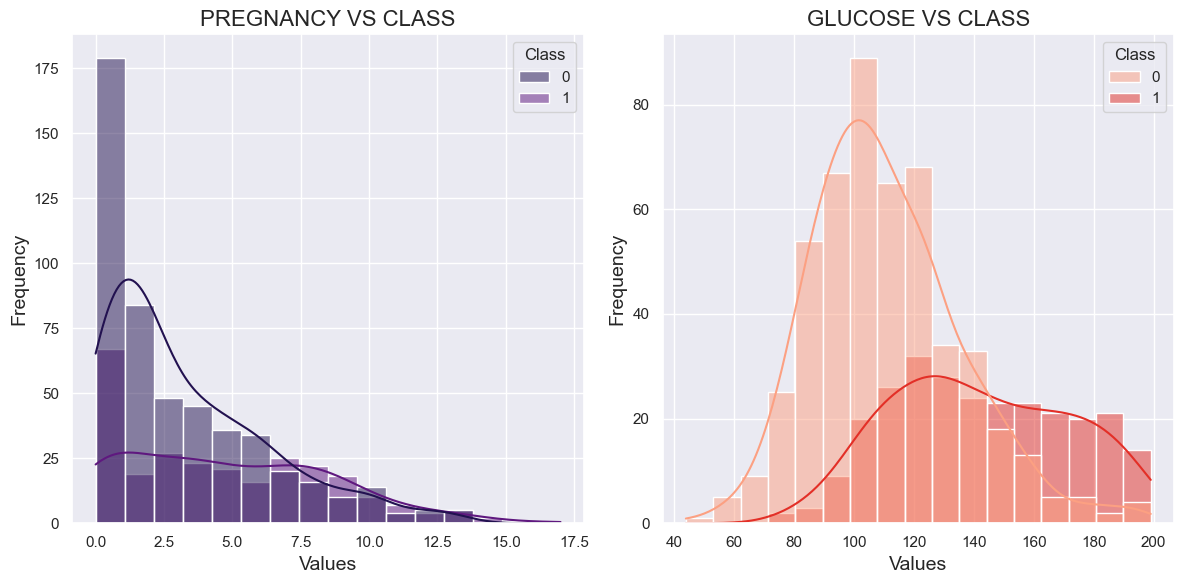

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))


axes[0].set_title('PREGNANCY VS CLASS', fontsize=16)
axes[0].set_xlabel('Values', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
sns.histplot(data=df,x='Pregnant', ax=axes[0], hue='Class',kde=True)

axes[1].set_title('GLUCOSE VS CLASS', fontsize=16)
axes[1].set_xlabel('Values', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
sns.histplot(data=df,x='GLUCOSE', ax=axes[1], hue='Class',palette="Reds",kde=True)
plt.tight_layout()



# Plot the second histogram


  <div style="background-color:lightblue; color:darkblue; padding:10px; font-size:35px;width:95%; margin:0 auto; text-align:center;">
INFERENCES FROM THE HISTOGRAMS
</div>
<div style="background-color:white; color:purple; padding:10px; font-size:25px;width:95%; margin:0 auto; text-align:left; display: flex; justify-content: space-between;">
  
  <!-- First Column -->
  <div style="width:48%; background-color:lavender;padding:20px;">
    <ol style="margin:0 left; text-align:left;">
      <li>PREGNANCY VS CLASS<br>
      <br>
        <ul>
          <li style="font-size:20px">Most of the individuals in the dataset have 0 pregnancies, especially in the "Class 0" group (non-diabetic).</li>
          <li style="font-size:20px">For the "Class 1" group (Diabetic class), individuals with higher numbers of pregnancies (between 5-10) seem more frequent compared to "Class 0."</li>
          <li style="font-size:20px">This suggests that a higher number of pregnancies might be associated with a greater likelihood of belonging to "Class 1" (perhaps indicating a higher risk factor).</li>
          </ul>
      </li>
    </ol>
  </div>
  
  <!-- Second Column -->
  <div style="width:48%; background-color:#FA8072; padding:20px;color:white">
    <ol start="2">
      <li>GLUCOSE VS CLASS<br>
      <br>
        <ul>
          <li style="font-size:20px">The "Class 0" group has a large concentration of individuals in their 20s and early 30s, indicating that younger individuals are more frequent in this group.</li>
          <li style="font-size:20px">The "Class 1" group also has individuals concentrated in younger age brackets but shows slightly more spread across older ages, particularly between the ages of 30-50.</li>
          <li style="font-size:20px">This suggests that older age may be correlated with a higher likelihood of being in "Class 1," which could point toward age as a risk factor.</li>
        </ul>
      </li>
    </ol>
  </div>

</div>


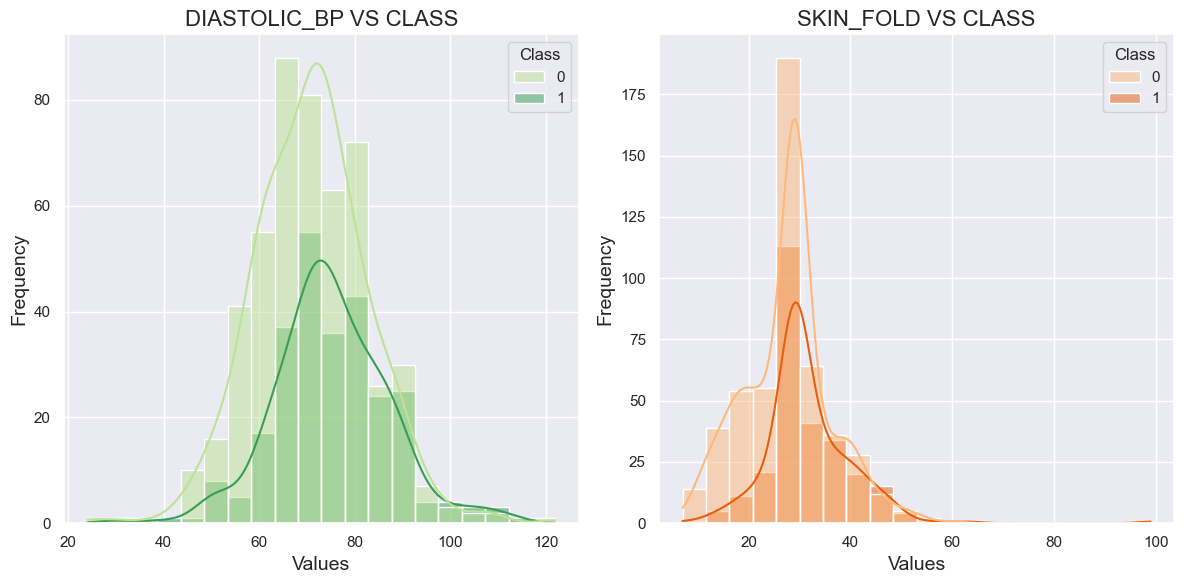

In [114]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
virdis=sns.color_palette("viridis", as_cmap=True)(0.6)

axes[0].set_title('DIASTOLIC_BP VS CLASS', fontsize=16)
axes[0].set_xlabel('Values', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
sns.histplot(data=df,x='DIASTOLIC_BP', ax=axes[0], hue='Class', palette="YlGn",kde=True,bins=20)


axes[1].set_title('SKIN_FOLD VS CLASS', fontsize=16)
axes[1].set_xlabel('Values', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
sns.histplot(data=df,x='SKIN_FOLD', ax=axes[1], hue='Class',palette="Oranges",kde=True,bins=20)
plt.tight_layout()



# Plot the second histogram


  <div style="background-color:lightblue; color:darkblue; padding:10px; font-size:35px;width:95%; margin:0 auto; text-align:center;">
INFERENCES FROM THE HISTOGRAMS
</div>
<div style="background-color:white; color:purple; padding:10px; font-size:25px;width:95%; margin:0 auto; text-align:left; display: flex; justify-content: space-between;">
  
  <!-- First Column -->
  <div style="width:48%; background-color:lightgreen;color:darkgreen;padding:20px;">
    <ol style="margin:0 left; text-align:left;">
      <li>DIASTOLIC_BP VS CLASS<br>
      <br>
        <ul>
          <li style="font-size:20px">Class 0 (Non-diabetic) shows a roughly normal distribution with a peak between 70-80 mmHg.</li>
          <li style="font-size:20px">Class 1 (Diabetic) has a lower overall frequency and also peaks between 70-80 mmHg but shows a slight skew compared to Class 0.</li>
          <li style="font-size:20px">As the data is evenly spread across the values it may not be an crucial factor in deciding whether the person is diabetic or not.</li>
          </ul>
      </li>
    </ol>
  </div>
  
  <!-- Second Column -->
  <div style="width:48%; background-color:orange; padding:20px;color:white">
    <ol start="2">
      <li>SKINFOLD VS CLASS<br>
      <br>
        <ul>
          <li style="font-size:20px">Class 0 shows a sharp peak around 20-30 mm and declines steadily, indicating most non-diabetics have lower skinfold thickness.</li>
          <li style="font-size:20px">Class 1 shows a broader peak around 30-40 mm, suggesting that individuals with diabetes may have slightly higher skin fold thickness on average.</li>
          <li style="font-size:20px">Higher skin fold thickness could be indicative of diabetes, with more variation in the diabetic group.</li>
        </ul>
      </li>
    </ol>
  </div>

</div>


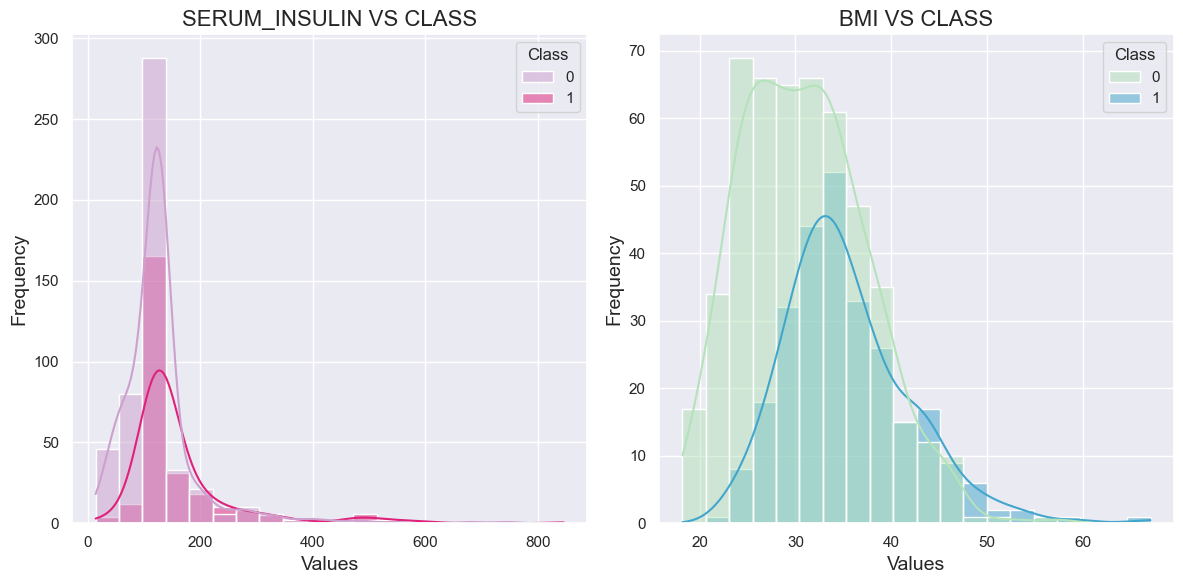

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
virdis=sns.color_palette("viridis", as_cmap=True)(0.6)

axes[0].set_title('SERUM_INSULIN VS CLASS', fontsize=16)
axes[0].set_xlabel('Values', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
sns.histplot(data=df,x='SERUM_INSULIN', ax=axes[0], hue='Class', palette="PuRd",kde=True,bins=20)


axes[1].set_title('BMI VS CLASS', fontsize=16)
axes[1].set_xlabel('Values', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
sns.histplot(data=df,x='bmi', ax=axes[1], hue='Class',palette="GnBu",kde=True,bins=20)
plt.tight_layout()



# Plot the second histogram


  <div style="background-color:lightblue; color:darkblue; padding:10px; font-size:35px;width:95%; margin:0 auto; text-align:center;">
INFERENCES FROM THE HISTOGRAMS
</div>
<div style="background-color:white; color:purple; padding:10px; font-size:25px;width:95%; margin:0 auto; text-align:left; display: flex; justify-content: space-between;">
  
  <!-- First Column -->
  <div style="width:48%; background-color:lightpink;color:darkpink;padding:20px;">
    <ol style="margin:0 left; text-align:left;">
      <li>SERUM_INSULIN VS CLASS<br>
      <br>
        <ul>
          <li style="font-size:20px">Class 0 has a sharp peak around 100-150 µU/mL, indicating lower serum insulin levels are more common in non-diabetics.</li>
          <li style="font-size:20px">Class 1 shows more individuals with higher serum insulin levels (200-300 µU/mL), with a wider distribution overall.</li>
          <li style="font-size:20px"> Elevated serum insulin levels seem to correlate with the diabetic class, likely due to insulin resistance.</li>
          </ul>
      </li>
    </ol>
  </div>
  
  <!-- Second Column -->
  <div style="width:48%; background-color:#98FFCC; padding:20px;color:blue">
    <ol start="2">
      <li>BMI VS CLASS<br>
      <br>
        <ul>
          <li style="font-size:20px">Class 0 tends to have a peak around 25-30, which is in the overweight range, but the distribution is narrower.</li>
          <li style="font-size:20px">Class 1 shows a wider spread with a peak at a higher BMI (30-35), indicating a higher prevalence of obesity among diabetics.</li>
          <li style="font-size:20px">Higher BMI is strongly associated with Class 1 (diabetics), showing that obesity may be a risk factor for diabetes.</li>
        </ul>
      </li>
    </ol>
  </div>

</div>


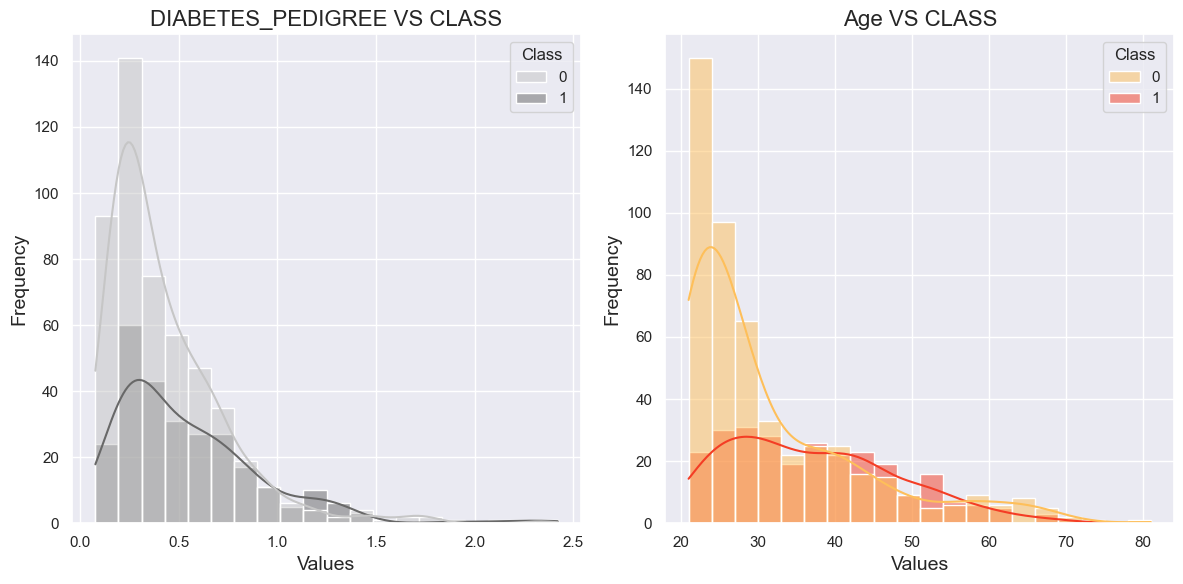

In [113]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
virdis=sns.color_palette("viridis", as_cmap=True)(0.6)

axes[0].set_title('DIABETES_PEDIGREE VS CLASS', fontsize=16)
axes[0].set_xlabel('Values', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
sns.histplot(data=df,x='Diabetes_Pedigree', ax=axes[0], hue='Class', palette="Greys",kde=True,bins=20)


axes[1].set_title('Age VS CLASS', fontsize=16)
axes[1].set_xlabel('Values', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
sns.histplot(data=df,x='Age', ax=axes[1], hue='Class',palette="YlOrRd",kde=True,bins=20)
plt.tight_layout()



# Plot the second histogram


  <div style="background-color:lightblue; color:darkblue; padding:10px; font-size:35px;width:95%; margin:0 auto; text-align:center;">
INFERENCES FROM THE HISTOGRAMS
</div>
<div style="background-color:white; color:purple; padding:10px; font-size:25px;width:95%; margin:0 auto; text-align:left; display: flex; justify-content: space-between;">
  
  <!-- First Column -->
  <div style="width:48%; background-color:lightgrey;color:grey;padding:20px;">
    <ol style="margin:0 left; text-align:left;">
      <li>DIASTOLIC_BP VS CLASS<br>
      <br>
        <ul>
          <li style="font-size:20px">Class 0 has a sharp drop-off as the pedigree score increases, with most individuals clustering around low values (below 0.5).</li>
          <li style="font-size:20px">Class 1 shows a flatter distribution, with more individuals having higher pedigree scores (above 0.5).</li>
          <li style="font-size:20px">Higher diabetes pedigree scores correlate more with individuals in Class 1, reflecting a potential genetic predisposition to diabetes.</li>
          </ul>
      </li>
    </ol>
  </div>
  
  <!-- Second Column -->
  <div style="width:48%; background-color:#FFCC98; padding:20px;color:red">
    <ol start="2">
      <li>SKINFOLD VS CLASS<br>
      <br>
        <ul>
          <li style="font-size:20px">Class 0 is concentrated around the younger age range (20-30 years), while Class 1 has a more evenly distributed frequency, with a secondary peak around 50 years.</li>
          <li style="font-size:20px">Older age appears to be more associated with diabetes, as evidenced by the higher frequency of older individuals in Class 1.</li>
          </ul>
        </ul>
      </li>
    </ol>
  </div>

</div>


In [7]:
df['Glucose'] = df['Glucose'].astype(float)
df['Class']=df['Class'].astype(object)

<div style="background-color:lightgreen; color:darkgreen; padding:10px; font-size:25px;width:50%; margin:0 left; text-align:left;">
TO CHECK IF THERE ARE ANY MISSING VALUES
</div>

In [8]:
df.isnull().sum()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

<div style="background-color:lightgreen; color:darkgreen; padding:10px; font-size:25px;width:70%; margin:0 left; text-align:left;">
THERE 5 COLUMNS IN WHICH MISSING VALUES ARE PRESENT
</div>

In [9]:
a=df.columns

<div style="background-color:lightgreen; color:darkgreen; padding:10px; font-size:25px;width:80%; margin:0 left; text-align:left;">
FINDING THE DISTRIBUTION OF MISSING VALUES IN ORDER TO REPLACE THEM
</div>

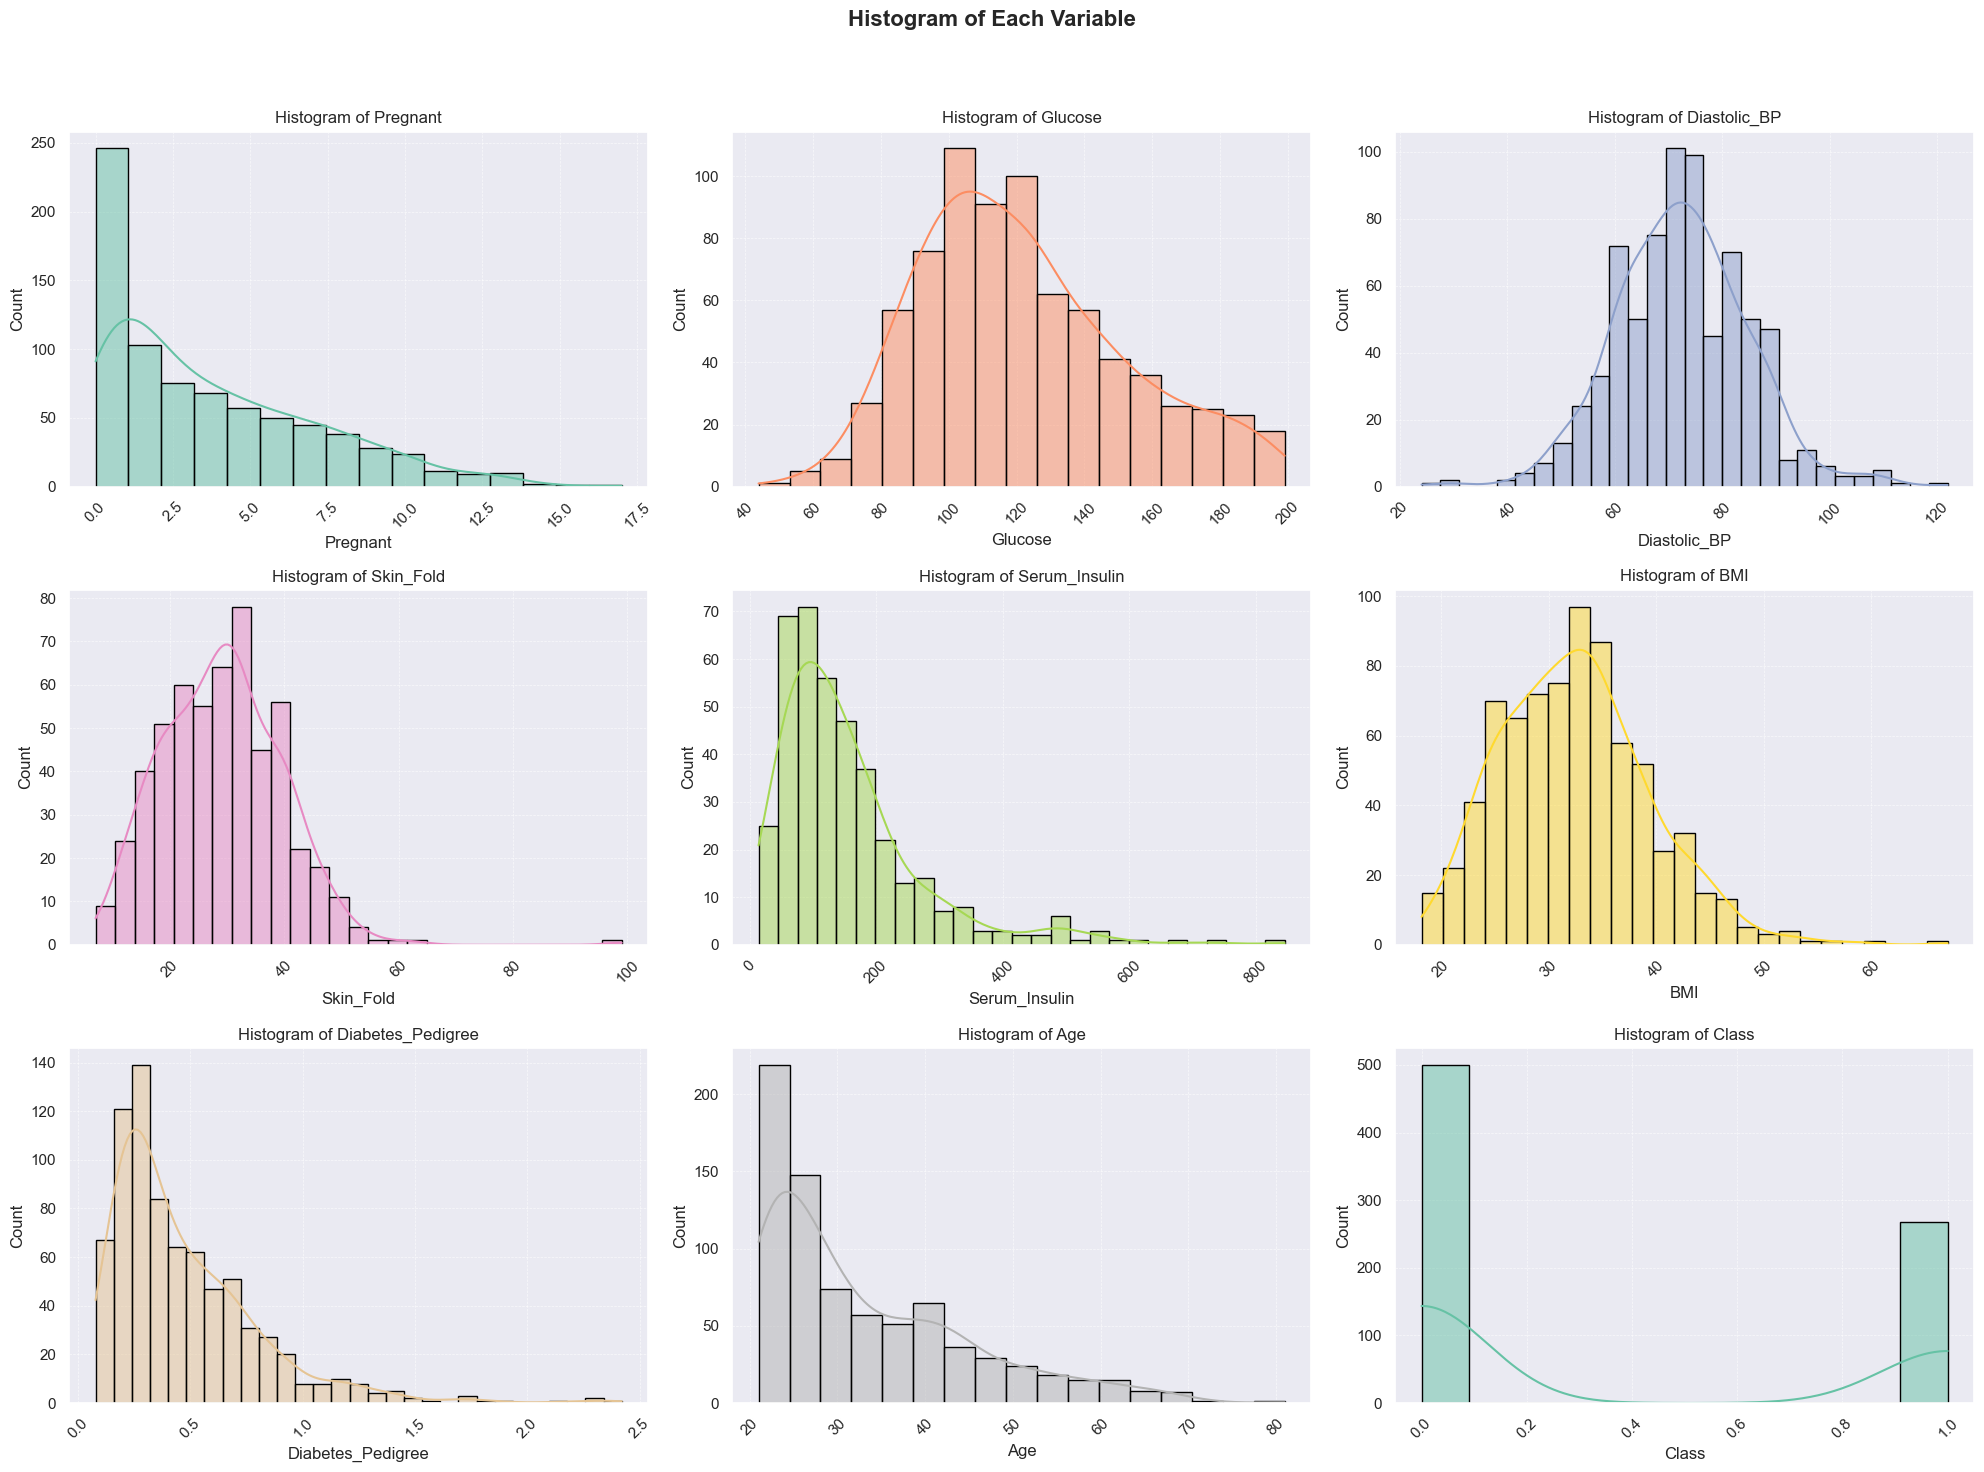

In [10]:
# Set the overall style and palette
sns.set_theme(style="darkgrid", palette="magma")  # You can change style and palette as needed

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle("Histogram of Each Variable", fontsize=16, fontweight='bold')

# Flatten the axes array for easier indexing
axes = axes.flatten()

# List of custom colors for each plot
colors = sns.color_palette("Set2", len(a))

# Loop through each variable and plot on the respective subplot
for idx, variable in enumerate(a):
    sns.histplot(
        ax=axes[idx], 
        x=df[variable], 
        kde=True, 
        color=colors[idx],  # Assign a unique color to each plot
        edgecolor='black'   # Add black edges to the bars for better contrast
    )
    axes[idx].set_title(f"Histogram of {variable}", fontsize=12, fontweight='medium')
    axes[idx].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed
    axes[idx].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  # Customize grid lines

# Hide empty subplots if the number of variables is less than 9
for ax in axes[len(a):]:
    ax.set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the suptitle
plt.show()


<div style="background-color:lightgreen; color:darkgreen; padding:10px; font-size:25px;width:95%; margin:0 left; text-align:left;">
AS WE OBSERVE FROM THE ABOVE GRAPHS THAT FEW OF THEM ARE NORMALY DISTRIBUTED AND SOME FOLLOW SKEWED DISTRIBUTION.
<ol>
<li>NORMALY DISTRIBUTED
<ul>
<li>GLUCOSE 
<li>DIASTOLIC_BP
</ul>
<li>SKEWED DISTRIBUTION
<ul>
<li>PREGNANT
<li>SKINFOLD
<li>SERUM INSULIN
<li>BMI
<li>DIABETES PEDIGREE
<li>AGE
</ul>

<div style="background-color:lightgreen; color:darkgreen; padding:10px; font-size:25px;width:95%; margin:0 left; text-align:center;">
SO WE REPLACE THE NORMAL DISTRIBUTION WITH "MEAN" IMPUTATION AND SKEWED DISTRIBUTION WITH "MEDIAN" IMPUTATION
</ul>

In [11]:
df['Glucose'].isnull().sum()

5

In [12]:
df['GLUCOSE']=df['Glucose'].fillna(df['Glucose'].mean)

In [13]:
df['GLUCOSE'].isnull().sum()

0

In [14]:
df['Diastolic_BP'].isnull().sum()

35

In [15]:
df['DIASTOLIC_BP']=df['Diastolic_BP'].fillna(df['Diastolic_BP'].mean())

In [16]:
df['DIASTOLIC_BP'].isnull().sum()

0

In [17]:
df['Skin_Fold'].isnull().sum()

227

In [18]:
df['SKIN_FOLD']=df['Skin_Fold'].fillna(df['Skin_Fold'].median())

In [19]:
df['SKIN_FOLD'].isnull().sum()

0

In [20]:
df[['SKIN_FOLD','Skin_Fold']]

,SKIN_FOLD,Skin_Fold
0,35.0,35.0
1,29.0,29.0
2,29.0,NaN
3,23.0,23.0
4,35.0,35.0
...,...,...
763,48.0,48.0
764,27.0,27.0
765,23.0,23.0
766,29.0,NaN


In [21]:
df['Serum_Insulin'].isnull().sum()

374

In [22]:
df['SERUM_INSULIN']=df['Serum_Insulin'].fillna(df['Serum_Insulin'].median())

In [23]:
df['SERUM_INSULIN'].isnull().sum()

0

In [24]:
df[['SERUM_INSULIN','Serum_Insulin']]

,SERUM_INSULIN,Serum_Insulin
0,125.0,NaN
1,125.0,NaN
2,125.0,NaN
3,94.0,94.0
4,168.0,168.0
...,...,...
763,180.0,180.0
764,125.0,NaN
765,112.0,112.0
766,125.0,NaN


In [25]:
df['BMI'].isnull().sum()

11

In [26]:
df['bmi']=df['BMI'].fillna(df['BMI'].median())

In [27]:
df['bmi'].isnull().sum()

0

In [28]:
df.isnull().sum()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
GLUCOSE                0
DIASTOLIC_BP           0
SKIN_FOLD              0
SERUM_INSULIN          0
bmi                    0
dtype: int64

In [29]:
df.drop(['Glucose', 'Diastolic_BP','Skin_Fold','Serum_Insulin','BMI'], axis = 1, inplace = True)

In [30]:
df

,Pregnant,Diabetes_Pedigree,Age,Class,GLUCOSE,DIASTOLIC_BP,SKIN_FOLD,SERUM_INSULIN,bmi
0,6,0.627,50,1,148.0,72.0,35.0,125.0,33.6
1,1,0.351,31,0,85.0,66.0,29.0,125.0,26.6
2,8,0.672,32,1,183.0,64.0,29.0,125.0,23.3
3,1,0.167,21,0,89.0,66.0,23.0,94.0,28.1
4,0,2.288,33,1,137.0,40.0,35.0,168.0,43.1
...,...,...,...,...,...,...,...,...,...
763,10,0.171,63,0,101.0,76.0,48.0,180.0,32.9
764,2,0.340,27,0,122.0,70.0,27.0,125.0,36.8
765,5,0.245,30,0,121.0,72.0,23.0,112.0,26.2
766,1,0.349,47,1,126.0,60.0,29.0,125.0,30.1


In [31]:
df.isnull().sum()

Pregnant             0
Diabetes_Pedigree    0
Age                  0
Class                0
GLUCOSE              0
DIASTOLIC_BP         0
SKIN_FOLD            0
SERUM_INSULIN        0
bmi                  0
dtype: int64

In [32]:
df['Class'].value_counts()

Class
0    500
1    268
Name: count, dtype: int64

In [33]:
df_minority=df[df['Class']==1]
df_majority=df[df['Class']==0]

In [34]:
df_minority_upsample=resample(df_minority,
                              replace=True,
                              n_samples=len(df_majority),
                              random_state=42)

In [35]:
df_minority_upsample

,Pregnant,Diabetes_Pedigree,Age,Class,GLUCOSE,DIASTOLIC_BP,SKIN_FOLD,SERUM_INSULIN,bmi
269,2,0.240,28,1,146.0,72.405184,29.0,125.0,27.5
283,7,0.165,47,1,161.0,86.000000,29.0,125.0,30.4
195,5,0.395,29,1,158.0,84.000000,41.0,210.0,39.4
535,4,0.302,23,1,132.0,72.405184,29.0,125.0,32.9
38,2,0.503,27,1,90.0,68.000000,42.0,125.0,38.2
...,...,...,...,...,...,...,...,...,...
612,7,0.787,40,1,168.0,88.000000,42.0,321.0,38.2
586,8,0.129,41,1,143.0,66.000000,29.0,125.0,34.9
730,3,0.323,34,1,130.0,78.000000,23.0,79.0,28.4
664,6,0.245,40,1,115.0,60.000000,39.0,125.0,33.7


In [36]:
df_upsampled=pd.concat([df_majority,df_minority_upsample])

In [37]:
df_upsampled

,Pregnant,Diabetes_Pedigree,Age,Class,GLUCOSE,DIASTOLIC_BP,SKIN_FOLD,SERUM_INSULIN,bmi
1,1,0.351,31,0,85.0,66.000000,29.0,125.0,26.6
3,1,0.167,21,0,89.0,66.000000,23.0,94.0,28.1
5,5,0.201,30,0,116.0,74.000000,29.0,125.0,25.6
7,10,0.134,29,0,115.0,72.405184,29.0,125.0,35.3
10,4,0.191,30,0,110.0,92.000000,29.0,125.0,37.6
...,...,...,...,...,...,...,...,...,...
612,7,0.787,40,1,168.0,88.000000,42.0,321.0,38.2
586,8,0.129,41,1,143.0,66.000000,29.0,125.0,34.9
730,3,0.323,34,1,130.0,78.000000,23.0,79.0,28.4
664,6,0.245,40,1,115.0,60.000000,39.0,125.0,33.7


In [38]:
df_upsampled['Class'].value_counts()

Class
0    500
1    500
Name: count, dtype: int64